In [123]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [124]:
# Load the provided dataset
sales_data = pd.read_excel('milk-day-sales.xlsx')
sales_data.head(), sales_data.tail()

(        date  sales
 0 2021-05-13    676
 1 2021-05-14    667
 2 2021-05-15    372
 3 2021-05-16    259
 4 2021-05-17    270,
           date  sales
 146 2021-10-08    422
 147 2021-10-09    381
 148 2021-10-10    508
 149 2021-10-11    369
 150 2021-10-12    361)

In [125]:
sales_data.info() ## Glance at the dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    151 non-null    datetime64[ns]
 1   sales   151 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [126]:
sales_data = sales_data.set_index('date')  # Set the time variable as an index
sales_data.index =  pd.date_range(start=sales_data.index[0] , periods=len(sales_data), freq='D')

In [127]:
sales_data_train = sales_data.iloc[:-60, :] # Train set
sales_data_test = sales_data.iloc[-60:, :] # Test set for validation

sales_data_train.index = pd.date_range(start=sales_data_train.index[0] , periods=len(sales_data_train), freq='D')
sales_data_test.index = pd.date_range(start=sales_data_test.index[0] , periods=len(sales_data_test), freq='D')
sales_data_train.shape, sales_data_test.shape

((91, 1), (60, 1))

In [128]:
sales_data_test['sales']

2021-08-12     337
2021-08-13     288
2021-08-14     454
2021-08-15     565
2021-08-16     427
2021-08-17     373
2021-08-18     414
2021-08-19     500
2021-08-20     381
2021-08-21     306
2021-08-22     484
2021-08-23     404
2021-08-24     408
2021-08-25     296
2021-08-26     525
2021-08-27     399
2021-08-28     147
2021-08-29     312
2021-08-30     345
2021-08-31     267
2021-09-01     319
2021-09-02     534
2021-09-03     264
2021-09-04     164
2021-09-05     699
2021-09-06     576
2021-09-07     504
2021-09-08     427
2021-09-09     876
2021-09-10     762
2021-09-11     307
2021-09-12    1118
2021-09-13     846
2021-09-14     631
2021-09-15     510
2021-09-16     478
2021-09-17     463
2021-09-18     404
2021-09-19     350
2021-09-20    1263
2021-09-21     774
2021-09-22     625
2021-09-23     599
2021-09-24     441
2021-09-25     454
2021-09-26     570
2021-09-27     563
2021-09-28     583
2021-09-29     472
2021-09-30     214
2021-10-01     348
2021-10-02     448
2021-10-03  

In [129]:
sales_data_train['sales']

2021-05-13    676
2021-05-14    667
2021-05-15    372
2021-05-16    259
2021-05-17    270
             ... 
2021-08-07     60
2021-08-08    573
2021-08-09    586
2021-08-10    369
2021-08-11    527
Freq: D, Name: sales, Length: 91, dtype: int64

In [130]:
# Import the relevant libraries
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# sales_data_train = pd.Series(sales_data_train['sales']).astype('float64')
sales_data_train = pd.Series(sales_data_test['sales']).astype('float64')
ets_model = ETSModel(sales_data_train, error='mul', trend='add', seasonal = 'mul',
                     damped_trend=True, seasonal_periods=7, initial_level=sales_data_train.values.mean(), freq='D')
ets_fitted = ets_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  7.26317D+00    |proj g|=  1.40328D+00

At iterate    1    f=  7.11471D+00    |proj g|=  1.04463D+00

At iterate    2    f=  6.92348D+00    |proj g|=  8.93253D-01

At iterate    3    f=  6.79128D+00    |proj g|=  6.81952D-01

At iterate    4    f=  6.71114D+00    |proj g|=  3.34639D-01

At iterate    5    f=  6.66681D+00    |proj g|=  1.70771D-01

At iterate    6    f=  6.64758D+00    |proj g|=  6.08481D-02

At iterate    7    f=  6.63932D+00    |proj g|=  4.97184D-02

At iterate    8    f=  6.63345D+00    |proj g|=  6.06942D-02

At iterate    9    f=  6.61945D+00    |proj g|=  1.21007D-01

At iterate   10    f=  6.61053D+00    |proj g|=  8.34738D-02

At iterate   11    f=  6.60456D+00    |proj g|=  2.89996D-02

At iterate   12    f=  6.60441D+00    |proj g|=  2.82722D-02

At iterate   13    f=  6.6

In [131]:
print(ets_fitted.summary())

                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                   60
Model:                      ETS(MAdM)   Log Likelihood                -396.027
Date:                Wed, 22 Dec 2021   AIC                            820.054
Time:                        16:35:50   BIC                            849.375
Sample:                    08-12-2021   HQIC                           831.523
                         - 10-10-2021   Scale                            0.165
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.1398        nan        nan        nan         nan         nan
smoothing_trend     1.398e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

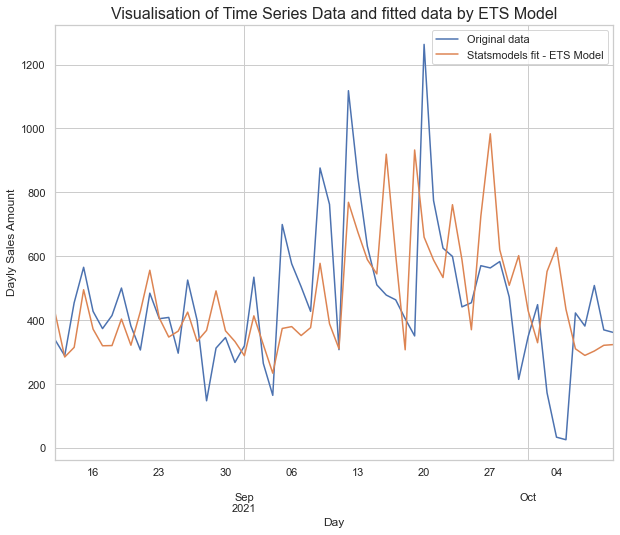

In [132]:
plt.figure(figsize=(10,8))
sales_data_train.plot(label='Original data')
ets_fitted.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Dayly Sales Amount");
plt.xlabel("Day")
plt.legend()

In [133]:
ets_fitted.predict()[-60:]

2021-08-12    420.314054
2021-08-13    283.959350
2021-08-14    314.255561
2021-08-15    494.764518
2021-08-16    371.432298
2021-08-17    319.237346
2021-08-18    319.855259
2021-08-19    402.873053
2021-08-20    320.901588
2021-08-21    426.622001
2021-08-22    555.743350
2021-08-23    406.288398
2021-08-24    346.580811
2021-08-25    365.101628
2021-08-26    424.612745
2021-08-27    333.252789
2021-08-28    367.447163
2021-08-29    491.134268
2021-08-30    366.089186
2021-08-31    332.593463
2021-09-01    288.111281
2021-09-02    412.941128
2021-09-03    322.726736
2021-09-04    233.393081
2021-09-05    373.487439
2021-09-06    379.232520
2021-09-07    351.250877
2021-09-08    375.998114
2021-09-09    577.419908
2021-09-10    388.151366
2021-09-11    309.942494
2021-09-12    768.535366
2021-09-13    674.884341
2021-09-14    588.987777
2021-09-15    544.226342
2021-09-16    919.143635
2021-09-17    602.696330
2021-09-18    306.674996
2021-09-19    932.326601
2021-09-20    659.425896


In [134]:
# ETS Model for Validation
sales_data = pd.Series(sales_data['sales']).astype('float64')
ets_model_holdout = ETSModel(sales_data, error='mul', trend='add', seasonal = 'mul',
                             damped_trend=True, seasonal_periods=7,
                             initial_level=sales_data_train.values.mean(), freq='D')
ets_fitted_holdout = ets_model_holdout.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  6.72141D+00    |proj g|=  4.60612D-01

At iterate    1    f=  6.66760D+00    |proj g|=  1.80622D-01

At iterate    2    f=  6.64079D+00    |proj g|=  5.19727D-01

At iterate    3    f=  6.62052D+00    |proj g|=  1.30831D-01

At iterate    4    f=  6.61211D+00    |proj g|=  2.13352D-01

At iterate    5    f=  6.59767D+00    |proj g|=  1.85983D-01

At iterate    6    f=  6.57384D+00    |proj g|=  1.16388D-01

At iterate    7    f=  6.56757D+00    |proj g|=  1.15252D-01

At iterate    8    f=  6.56025D+00    |proj g|=  3.73425D-02

At iterate    9    f=  6.55850D+00    |proj g|=  3.01468D-02

At iterate   10    f=  6.55673D+00    |proj g|=  4.51458D-02

At iterate   11    f=  6.55628D+00    |proj g|=  3.93143D-02

At iterate   12    f=  6.55602D+00    |proj g|=  1.44078D-02

At iterate   13    f=  6.5

In [135]:
# Predicted values for holdout samples (test samples) - ETS model
ets_fitted_holdout.predict()[-60:]

2021-08-12    340.234800
2021-08-13    288.559591
2021-08-14    237.074311
2021-08-15    431.392461
2021-08-16    451.569114
2021-08-17    329.940372
2021-08-18    381.086483
2021-08-19    386.345954
2021-08-20    337.163472
2021-08-21    280.513229
2021-08-22    473.516468
2021-08-23    482.442968
2021-08-24    348.846763
2021-08-25    404.402432
2021-08-26    396.246149
2021-08-27    346.783244
2021-08-28    289.073304
2021-08-29    461.097484
2021-08-30    454.334390
2021-08-31    326.045715
2021-09-01    365.515457
2021-09-02    363.094917
2021-09-03    322.047896
2021-09-04    260.088902
2021-09-05    419.934957
2021-09-06    453.998088
2021-09-07    342.004841
2021-09-08    407.770712
2021-09-09    411.915588
2021-09-10    387.201856
2021-09-11    347.542709
2021-09-12    575.217383
2021-09-13    637.425860
2021-09-14    482.808777
2021-09-15    566.877757
2021-09-16    564.674843
2021-09-17    472.282259
2021-09-18    387.322882
2021-09-19    650.983427
2021-09-20    632.618336


<Figure size 720x576 with 0 Axes>

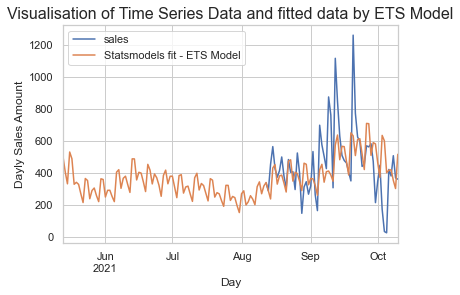

In [138]:
plt.figure(figsize=(10,8))
sales_data_test.plot(label='Original data')
ets_fitted_holdout.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Dayly Sales Amount");
plt.xlabel("Day")
plt.legend()

In [136]:
ets_fitted_holdout.predict(start='2021/10/10',end='2021/10/30')

2021-10-10    516.720251
2021-10-11    510.255498
2021-10-12    374.782202
2021-10-13    427.514610
2021-10-14    429.934770
2021-10-15    364.957107
2021-10-16    299.879124
2021-10-17    501.845460
2021-10-18    510.245340
2021-10-19    374.776232
2021-10-20    427.509163
2021-10-21    429.930387
2021-10-22    364.954131
2021-10-23    299.877168
2021-10-24    501.842841
2021-10-25    510.243209
2021-10-26    374.774980
2021-10-27    427.508021
2021-10-28    429.929468
2021-10-29    364.953507
2021-10-30    299.876758
Freq: D, dtype: float64

In [137]:
holdout_results = pd.DataFrame({'actual': sales_data_test['sales'],
                                 'ets_holdout': ets_fitted_holdout.predict()[-60:].values,
                                 'ets': ets_fitted.predict()[-60:].values },
                               index = sales_data_test.index)
holdout_results


,actual,ets_holdout,ets
2021-08-12,337,340.234800,420.314054
2021-08-13,288,288.559591,283.959350
2021-08-14,454,237.074311,314.255561
2021-08-15,565,431.392461,494.764518
2021-08-16,427,451.569114,371.432298
2021-08-17,373,329.940372,319.237346
2021-08-18,414,381.086483,319.855259
2021-08-19,500,386.345954,402.873053
2021-08-20,381,337.163472,320.901588
2021-08-21,306,280.513229,426.622001
